# Data - more metrics

In [2]:
import json
import matplotlib.pyplot as plt

train = json.load(open('Data/train.json'))
dev = json.load(open('Data/dev.json'))


Number of at least once nonsensically judged samples in training set: 229 out of 2280


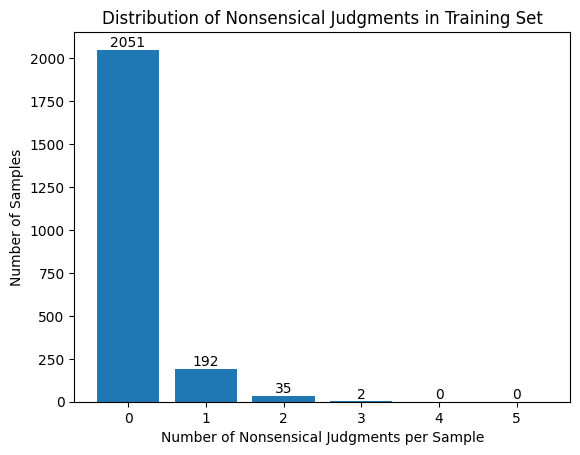

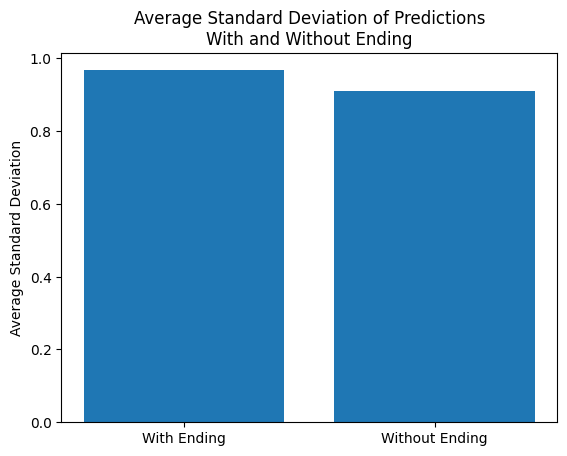

In [3]:
with_ending_stdev = 0
without_ending_stdev = 0
nonsensical_count = [0,0,0,0,0,0]
for data in train:
    metrics = train[data]
    if metrics["ending"] == "":
        without_ending_stdev += metrics["stdev"]
    else:
        with_ending_stdev += metrics["stdev"]
    nonsensical_count[sum(metrics["nonsensical"])] += 1

print(f"Number of at least once nonsensically judged samples in training set: {sum(nonsensical_count[1:6])} out of {len(train)}")
plt.bar(["0","1","2","3","4","5"], nonsensical_count)
plt.bar_label(plt.gca().containers[0])
plt.xlabel("Number of Nonsensical Judgments per Sample")
plt.ylabel("Number of Samples")
plt.title("Distribution of Nonsensical Judgments in Training Set")
plt.show()  
print()
print()


plt.bar(["With Ending", "Without Ending"], [with_ending_stdev/(len(train)*2/3), without_ending_stdev/(len(train)/3)])
plt.ylabel("Average Standard Deviation")
plt.title("Average Standard Deviation of Predictions\nWith and Without Ending")
plt.show()


Number of at least once nonsensically judged samples in dev set: 42 out of 588


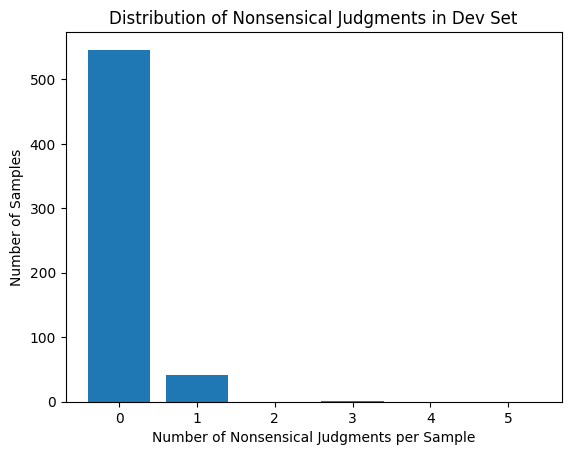

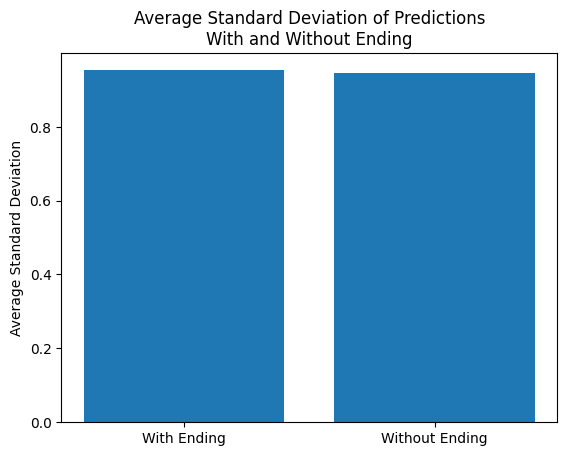

In [4]:
with_ending_stdev = 0
without_ending_stdev = 0
nonsensical_count = [0,0,0,0,0,0]
for data in dev:
    metrics = dev[data]
    if metrics["ending"] == "":
        without_ending_stdev += metrics["stdev"]
    else:
        with_ending_stdev += metrics["stdev"]
    nonsensical_count[sum(metrics["nonsensical"])] += 1

print(f"Number of at least once nonsensically judged samples in dev set: {sum(nonsensical_count[1:6])} out of {len(dev)}")
plt.bar(["0","1","2","3","4","5"], nonsensical_count)
plt.xlabel("Number of Nonsensical Judgments per Sample")
plt.ylabel("Number of Samples")
plt.title("Distribution of Nonsensical Judgments in Dev Set")
plt.show()  
print()
print()


plt.bar(["With Ending", "Without Ending"], [with_ending_stdev/(len(dev)*2/3), without_ending_stdev/(len(dev)/3)])
plt.ylabel("Average Standard Deviation")
plt.title("Average Standard Deviation of Predictions\nWith and Without Ending")
plt.show()

{'noending': 53, 'withending': 146}
199


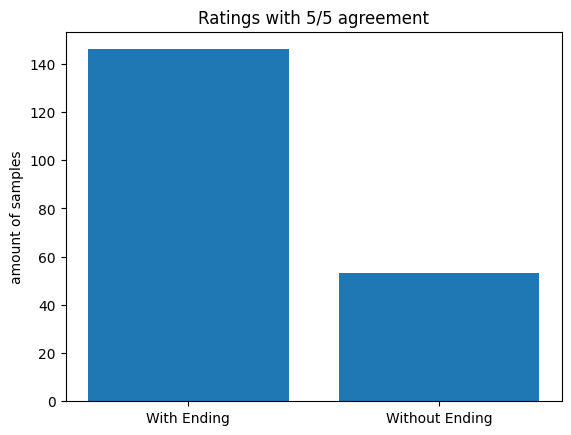

In [ ]:
stdev_iszero = []
with_ending = 0
without_ending = 0

for data in train:
    metrics = train[data]
    if metrics["stdev"] == 0:
        stdev_iszero.append(metrics)
        if metrics["ending"] == "":
            without_ending += 1
        else:
            with_ending += 1

print(ending_dic)
print(len(stdev_iszero))

plt.bar(["With Ending", "Without Ending"], [with_ending, without_ending])
plt.ylabel("amount of samples")
plt.title("Samples with 5/5 agreement in training set")
plt.show()


Observation: Annotation samples with an ending seem to have a higher agreement.

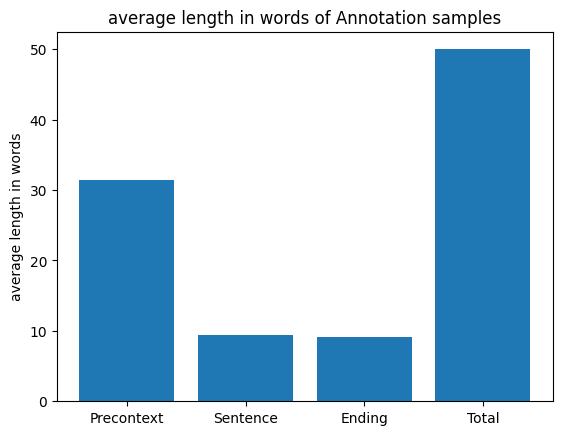

In [ ]:
len_precontext_list = []
len_sentence_list = []
len_ending_list = []
len_total_list = []

for data in train:
    metrics = train[data]
    len_precontext = len(metrics["precontext"].split())
    len_sentence = len(metrics["sentence"].split())
    len_ending = len(metrics["ending"].split())
    len_total = len_precontext + len_sentence + len_ending

    len_total_list.append(len_total)
    len_precontext_list.append(len_precontext)
    len_sentence_list.append(len_sentence)
    len_ending_list.append(len_ending)

average_total = sum(len_total_list) / len(len_total_list)
average_sentence = sum(len_sentence_list) / len(len_sentence_list)
average_precontext = sum(len_precontext_list) / len(len_precontext_list)
average_ending = sum(len_ending_list) / len(len_ending_list)

plt.bar(["Precontext", "Sentence", "Ending", "Total"], [average_precontext, average_sentence, average_ending, average_total])
plt.ylabel("average length in words")
plt.title("average length in words of Annotation samples in training set")
plt.show()


{4: 1998, 5: 3269, 2: 1947, 3: 1721, 1: 2499}


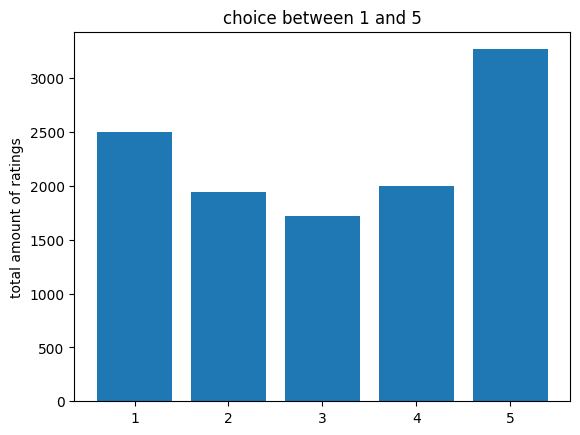

In [ ]:
ratings = {}

for data in train:
    metrics = train[data]
    for rating in metrics["choices"]:
        if rating not in ratings.keys():
            ratings[rating] = 1
        else:
            ratings[rating] += 1
print(ratings)

plt.bar(["1", "2", "3", "4", "5"], [ratings[1], ratings[2], ratings[3], ratings[4], ratings[5]])
plt.ylabel("Number of ratings")
plt.title("choice between 1 and 5")
plt.show()

Observation: Annotators tend to pick 1 or 5 the most